## "A Bossy Sort of Voice"
#### A study of sexism in the Harry Potter series using Natural Language Processing

My eldest son is almost 6 and loves the Harry Potter series of books.  But, as I read them for the first time with him as a bedtime story, I noticed something hadn't expected.  

The sexism.

The sexism critique of the Harry Potter novels is not a new one - many people have (written)[https://www.bustle.com/articles/136244-the-5-least-feminist-moments-in-harry-potter] excellent articles about Ron's treatment of Hermoine, the portrayl of other female characters as cold or incompetent or promiscuous.  But there were two types of analyses I didn't see: a quantitative or linguistics based one, or something that looked at how the author herself portrays female characters in a biased light in how they speak

My hope in doing this is that people will use some of these tools to look more critically at the language of literature we love and the popular press for signs of gender, racial, and other bias.

#### Getting started: setting up hypotheses and requirements

In this project, I will test three hypotheses:

1. Female characters are referred to by the narrator with sexist words throughout the series by the narrator, while males are not described with that same language.

2. The narrator will use more sexist words when describing the female characters than other characters will use when talking about them.

3. Sexism as defined above will decline in both dialog and narration as the series progresses.


Taking this approach requires tools to do the following, which I'll tackle in this workbook:

1. Process text from all 7 'Harry Potter' books.

2. Seperate dialog from narration.

3. Label dialog and narration.

4. Distinguish parts of speech, like nouns, verbs, and adjectives.
000

2. Look at the text at the word and sentence level.

3. Distinguish parts of speech, like nouns, verbs, and adjectives.

4. 

5. Be able to tell female characters from male characters

6. Have examples of sexist words and/or phrases to create a classifier. 

7. Reduce sexist words in the text to their root forms (e.g. 'shriller' should be equivalent to 'shrill').

8. Summarize the data to test our hypotheses.


#### Step 1: Process text from all 7 'Harry Potter' books.

What I mean by "process", is to get the text from the series into a format that can be read into a computer program for analysis.  For this project, I'll be using the [Python programming language](https://www.python.org/), and a few libraries (basically groupings of code that completes specialized common processes), most notably the [Natural Language Processing Toolkit (NLTK)](http://www.nltk.org/).

To do this, I am going to read 7 files in the .txt format, each containing text of one of the books, using Python's built-in `open` function and `read` method.  You can get the files for these and other books from [this site](https://archive.org/stream/pdfy-ZhGUmtnn6LEtA7jL/Harry%20Potter%20and%20the%20Philosopher%27s%20Stone%2C%20by%20J.K.%20Rowling_djvu.txt) -- note that you can use existing txt format files, or copy text, paste it in Notepad and save as a .txt file.

In this code, the files are named 'hp' then the book number - i.e. `hp1.txt` - and stored in a folder called `corpus`. To run the code as it is, you'll need to recreate this schema or alter the code to fit the path you create.

Let's write a function to read in our text.  

In [1]:
def read_file(num):
    text = ''
    with open('corpus/hp'+ str(num) + '.txt', 'rt') as file_in:
        for line in file_in:
            text = text + line
    return text

book_content = read_file(1)

Running this would return a single long string of text, and it's now usable in our program.  Notice that we pass in the number of the book we want to open with the `num` variable.

#### Step 2: Seperate dialog from narrative
In the text above, the opening and closing quotes look the same: `"`.  However, when we tokenize the text, NLTK makes opening and closing quotes look different, so we can see where dialog begins and ends.  Let's give it a try!

In [2]:
from nltk import word_tokenize

def tokenize_text(book_content):
    tokenized = word_tokenize(book_content)
    return tokenized

tokenized = tokenize_text(book_content)
print (tokenized[604:822])

['read', 'maps', 'or', 'signs', '.', 'Mr.', 'Dursley', 'gave', 'himself', 'a', 'little', 'shake', 'and', 'put', 'the', 'cat', 'out', 'of', 'his', 'mind', '.', 'As', 'he', 'drove', 'toward', 'town', 'he', 'thought', 'of', 'nothing', 'except', 'a', 'large', 'order', 'of', 'drills', 'he', 'was', 'hoping', 'to', 'get', 'that', 'day', '.', 'But', 'on', 'the', 'edge', 'of', 'town', ',', 'drills', 'were', 'driven', 'out', 'of', 'his', 'mind', 'by', 'something', 'else', '.', 'As', 'he', 'sat', 'in', 'the', 'usual', 'morning', 'traffic', 'jam', ',', 'he', 'could', "n't", 'help', 'noticing', 'that', 'there', 'seemed', 'to', 'be', 'a', 'lot', 'of', 'strangely', 'dressed', 'people', 'about', '.', 'People', 'in', 'cloaks', '.', 'Mr.', 'Dursley', 'could', "n't", 'bear', 'people', 'who', 'dressed', 'in', 'funny', 'clothes', '--', 'the', 'getups', 'you', 'saw', 'on', 'young', 'people', '!', 'He', 'supposed', 'this', 'was', 'some', 'stupid', 'new', 'fashion', '.', 'He', 'drummed', 'his', 'fingers', 'on

As you can see in the text above, our opening and closing quotes look like this: `'``' and "''"`.  This is a helpful tool in judging where dialog begins and ends across sentences.  Next, we will set up some rules around this and label parts of text.

#### Step 3: Label dialog and narration
In this step, we will label these two types of text while keeping them in order in case we need context.  To do this, we'll keep the list format to preserve order and create a tuple for each piece of dialogue.  So, for example:

`"''", 'That', 'can', 'be', 'rearranged', ',', "''", 'said', 'the', 'portrait', 'at', 'once', '.'`

Would become:

`('d', ["''", 'That', 'can', 'be', 'rearranged', ',', "''",]), ('n', ['said', 'the', 'portrait', 'at', 'once', '.'])`

What we'll do to achieve this is:
1. Create a new list called `parsed`.
1. Loop through the text in `tokenized` variable (printed above).  When we hit an open quote character, stop, grab everything up to that point and make it a list in a tuple where the first value is `n` for "narration", and the second value is a list containing all of those words (e.g. `('n', ['For', 'a', 'brief', 'moment', 'he', 'allowed', 'himself', 'the', 'impossible', 'hope', 'that', 'nobody', 'would', 'answer', 'him', '.', 'However', ',', 'a', 'voice', 'responded', 'at', 'once', ',', 'a', 'crisp', ',', 'decisive', 'voice', 'that', 'sounded', 'as', 'though', 'it', 'were', 'reading', 'a', 'prepared', 'statement', '.', 'It', 'was', 'coming', '--', 'as', 'the', 'Prime', 'Minister', 'had', 'known', 'at', 'the', 'first', 'cough', '--', 'from', 'the', 'froglike', 'little', 'man', 'wearing', 'a', 'long', 'silver', 'wig', 'who', 'was', 'depicted', 'in', 'a', 'small', ',', 'dirty', 'oil', 'painting', 'in', 'the', 'far', 'corner', 'of', 'the', 'room', '.',']`.  
2. Append this tuple to `text_parsed`.
3. Use the point where we found the open quote as a placeholder, then look ahead until we find a close quote.
4. Take the whole slice, from open quote to close quote.
4. Drop the slice into a tuple where the first value is `d` for "dialog" and the second value is a list containing all of the words and the quotes (e.g. `('d', '``', 'To', 'the', 'Prime', 'Minister', 'of', 'Muggles', '.', 'Urgent', 'we', 'meet', '.', 'Kindly', 'respond', 'immediately', '.', 'Sincerely', ',', 'Fudge', '.', "''")`)

The function to do this will be called `parse_text`. 

In [3]:
def parse_text(t):
    open_q = '``'
    close_q = "''"
    found_c = False # this will be used to break the while loop below
    # current will hold words until an open quote is found
    current = []
    # parsed is the list we'll eventually return, and where the ('n', ['sentence']) or ('d', ['sentence']) tuples
    # will be appended
    parsed = [] 
    length = len(t)
    i = 0

    while i < length:
        word = t[i]
        
        if word != open_q and word != close_q:
            current.append(word)

        elif word == open_q or word == close_q:
            parsed.append(('n', current))
            
            current = []
            current.append(word)
            
            while found_c == False and i < length-1:
                i += 1
                if t[i] != close_q:
                    current.append(t[i])
                else:
                    current.append(t[i])
                    parsed.append(('d', current))
                    current = []
                    found_c = True
        
        found_c = False
        i += 1
        
    return parsed
        

In [4]:
parsed = parse_text(tokenized)

# the text below is the same as above, now categorized with an 'n' (narration) or 'd' (dialog)
print(parsed[155:175])

[('d', ['``', 'At', 'last', '.', 'And', 'where', 'did', 'you', 'get', 'that', 'motorcycle', '?', "''"]), ('n', []), ('d', ['``', 'Borrowed', 'it', ',', 'Professor', 'Dumbledore', ',', 'sit', ',', "''"]), ('n', ['said', 'the', 'giant', ',', 'climbing', 'carefully', 'off', 'the', 'motorcycle', 'as', 'he', 'spoke', '.']), ('d', ['``', 'Young', 'Sirius', 'Black', 'lent', 'it', 'to', 'me', '.', 'I', "'ve", 'got', 'him', ',', 'sir', '.', "''"]), ('n', []), ('d', ['``', 'No', 'problems', ',', 'were', 'there', '?', "''"]), ('n', []), ('d', ['``', 'No', ',', 'sir', '--', 'house', 'was', 'almost', 'destroyed', ',', 'but', 'I', 'got', 'him', 'out', 'all', 'right', 'before', 'the', 'Muggles', 'started', 'swarmin', "'", 'around', '.', 'He', 'fell', 'asleep', 'as', 'we', 'was', 'flyin', "'", 'over', 'Bristol', '.', "''"]), ('n', ['Dumbledore', 'and', 'Professor', 'McGonagall', 'bent', 'forward', 'over', 'the', 'bundle', 'of', 'blankets', '.', 'Inside', ',', 'just', 'visible', ',', 'was', 'a', 'baby'

To recap: now we have a big list of tuples that represents an entire book, with the text still in its original order. 

Each item in the list is a tuple.  

The first value is the tuple an `'n'` for narration or `'d'` for dialog.  

The second item in the tuple is a list of tuples.  Each of these tuples include a word or punctuation mark and the appropriate tag for the part of speech it represents.


Now that we have our text organized the way we want it, we can run some analysis on the narration to see how Rowling portrays female characters.   There are a couple of challenges with this.

First, we need to isolate narrative passages that refer to female characters, either by name or pronoun.

The next challenge is determining how do we know something is sexist?  There are a couple of ways to approach this.  The first is to determine what rules we will use to determine something is sexist, then apply those rules to the passages we isolate.  The other would be to create an algorithm, feed it a labeled training set of sexist phrases and train it to recognize others.

For the purposes of this project, I'm going to use the first approach: writing a set of rules and testing each narrative passage against it.  This is more transparent and in my opinion less subject to bias than finding and labeling passages of text, and possibly less error prone.


#### Step 4: Isolating the right narrative passages
Let's create a list of all of the narrative that describes a female character.  The most basic step is creating a list of all of the narrative passages.  

To do this, we're going to loop through our full text variable, `tagged`, and pull out only the parts marked with `n` in the `isolate narrative` function below.

In [5]:
isolate_narrative = [p for p in parsed if p[0] == 'n']
#sample
print(isolate_narrative[2:3])

[('n', ['Mr.', 'Dursley', 'stopped', 'dead', '.', 'Fear', 'flooded', 'him', '.', 'He', 'looked', 'back', 'at', 'the', 'whisperers', 'as', 'if', 'he', 'wanted', 'to', 'say', 'something', 'to', 'them', ',', 'but', 'thought', 'better', 'of', 'it', '.', 'He', 'dashed', 'back', 'across', 'the', 'road', ',', 'hurried', 'up', 'to', 'his', 'office', ',', 'snapped', 'at', 'his', 'secretary', 'not', 'to', 'disturb', 'him', ',', 'seized', 'his', 'telephone', ',', 'and', 'had', 'almost', 'finished', 'dialing', 'his', 'home', 'number', 'when', 'he', 'changed', 'his', 'mind', '.', 'He', 'put', 'the', 'receiver', 'back', 'down', 'and', 'stroked', 'his', 'mustache', ',', 'thinking', '...', 'no', ',', 'he', 'was', 'being', 'stupid', '.', 'Potter', 'was', "n't", 'such', 'an', 'unusual', 'name', '.', 'He', 'was', 'sure', 'there', 'were', 'lots', 'of', 'people', 'called', 'Potter', 'who', 'had', 'a', 'son', 'called', 'Harry', '.', 'Come', 'to', 'think', 'of', 'it', ',', 'he', 'was', "n't", 'even', 'sure',

In [6]:
from itertools import groupby as gb

p_list = ['Harry', 'Ron', 'Ronald', 'Hermione']

def split_sent(t):
    sent_list = []
    for s in t:
        sent = s[1]
        k = [list(sent) for i, sent in gb(sent, lambda item: item=='.')]
        for i in k:
            if len(i) > 1:
                sent_list.append(i)
    return (sent_list)

def protagonist(n, p_list):
    protagonist_narrative = {
        'Harry': [],
        'Ron':  [],
        'Hermione':  [],
    }
    for i in n:
        for word in i:
            
            if word in p_list:
                if word == p_list[0]:
                    protagonist_narrative['Harry'].append(i)
                if word == p_list[1] or word == p_list[1]:
                    protagonist_narrative['Ron'].append(i)
                if word == p_list[3]:
                    protagonist_narrative['Hermione'].append(i)
                    
    return protagonist_narrative
        

narrative_split_sent = split_sent(isolate_narrative)
protagonist_dict = protagonist(narrative_split_sent, p_list)

In [7]:
# Let's print the first few entries from the  key to see 
print("*** Sample from the 'Harry' key ***")
print(protagonist_dict['Harry'][:5])
print("*** Sample from the 'Ron' key ***")
print(protagonist_dict['Ron'][:5])
print("*** Sample from the 'Hermione' key ***")
print(protagonist_dict['Hermione'][:5])

*** Sample from the 'Harry' key ***
[['He', 'was', 'sure', 'there', 'were', 'lots', 'of', 'people', 'called', 'Potter', 'who', 'had', 'a', 'son', 'called', 'Harry'], ['Come', 'to', 'think', 'of', 'it', ',', 'he', 'was', "n't", 'even', 'sure', 'his', 'nephew', 'was', 'called', 'Harry'], ['She', 'eyed', 'his', 'cloak', 'suddenly', 'as', 'though', 'she', 'thought', 'he', 'might', 'be', 'hiding', 'Harry', 'underneath', 'it'], ['Dumbledore', 'took', 'Harry', 'in', 'his', 'arms', 'and', 'turned', 'toward', 'the', 'Dursleys', "'", 'house'], ['He', 'bent', 'his', 'great', ',', 'shaggy', 'head', 'over', 'Harry', 'and', 'gave', 'him', 'what', 'must', 'have', 'been', 'a', 'very', 'scratchy', ',', 'whiskery', 'kiss']]
*** Sample from the 'Ron' key ***
[['said', 'Ron'], ['said', 'Ron', 'again'], ['mumbled', 'Ron'], ['said', 'Harry', 'and', 'Ron'], ['Ron', 'blurted', 'out']]
*** Sample from the 'Hermione' key ***
[['said', 'Hermione'], ['said', 'Hermione'], ['He', 'was', 'just', 'taking', 'Harry', '

##### Step 5: Distinguish parts of speech, like nouns, verbs, and adjectives
Now that we've categorized text as narration or dialog, we can use NLTK's classification function to categorize words by the part of speech they represent.

The `pos_tag` function of NLTK that we'll use to do this takes in a word as a string and returns a tuple of the word and a code for how it was classified.  For example, 'NNP' means the word has been tagged by NLTK as a proper noun, 'VB' means the word has been tagged as a verb.  So "Harry" in the sentence "Harry is Petunia's nephew." would come back as `('Harry', 'NNP')`.  

You can find a full list [here](https://pythonprogramming.net/natural-language-toolkit-nltk-part-speech-tagging/), but in the next steps we'll be focused primarily on adjectives, verbs and nouns.

We will import the `pos_tag` function from NLTK and tag the words in a new function called `tagged_text`.

In [8]:
from nltk import pos_tag

def tagged_text(i):
    tagged = [pos_tag(word) for word in i]
    return tagged


In [28]:
# Let's print the output of tagged text for the first few sentences that mention 'Harry' to see what this looks like
print(tagged_text(protagonist_dict['Harry'][:50]))

[[('He', 'PRP'), ('was', 'VBD'), ('sure', 'RB'), ('there', 'EX'), ('were', 'VBD'), ('lots', 'NNS'), ('of', 'IN'), ('people', 'NNS'), ('called', 'VBN'), ('Potter', 'NNP'), ('who', 'WP'), ('had', 'VBD'), ('a', 'DT'), ('son', 'NN'), ('called', 'VBN'), ('Harry', 'NNP')], [('Come', 'NNP'), ('to', 'TO'), ('think', 'VB'), ('of', 'IN'), ('it', 'PRP'), (',', ','), ('he', 'PRP'), ('was', 'VBD'), ("n't", 'RB'), ('even', 'RB'), ('sure', 'JJ'), ('his', 'PRP$'), ('nephew', 'NN'), ('was', 'VBD'), ('called', 'VBN'), ('Harry', 'NNP')], [('She', 'PRP'), ('eyed', 'VBD'), ('his', 'PRP$'), ('cloak', 'NN'), ('suddenly', 'RB'), ('as', 'IN'), ('though', 'IN'), ('she', 'PRP'), ('thought', 'VBD'), ('he', 'PRP'), ('might', 'MD'), ('be', 'VB'), ('hiding', 'VBG'), ('Harry', 'NNP'), ('underneath', 'IN'), ('it', 'PRP')], [('Dumbledore', 'NNP'), ('took', 'VBD'), ('Harry', 'NNP'), ('in', 'IN'), ('his', 'PRP$'), ('arms', 'NNS'), ('and', 'CC'), ('turned', 'VBD'), ('toward', 'IN'), ('the', 'DT'), ('Dursleys', 'NNP'), ("'

In [10]:
from collections import Counter

def parse_tagged(protagonist_dict):
    tagged_dict = {}
    descriptive_verbs = {}
    descriptive_adj = {}
    
    for k, v in protagonist_dict.items():
        # note that the dictionary is created while calling the tagged_text helper function
        tagged_dict[k] = tagged_text(protagonist_dict[k])
        # create a list under the key for the protagonist's name 
        descriptive_verbs[k] = []
        descriptive_adj[k] = []
        
        # iterate through the 
        for sent in tagged_dict[k]:
            for n in range(len(sent)):
                # check if the tuple is the protagonist's name
                if sent[n] == (k, 'NNP') or sent[n] == (k, 'NN'): 
                    # this case is for "noun verb" e.g. "harry said"
                    try:
                        # this case is for "noun verb" e.g. "harry said"
                        if 'VB' or 'RB' in sent[n+1][1]:
                            descriptive_verbs[k].append(sent[n+1][0])
                        
                        try:
                            # this case is for "noun verb adverb" e.g. "harry said angrily"
                            if 'VB' or 'RB' in sent[n+2][1]:
                                descriptive_verbs[k].append(sent[n+2][0])
                            # this case is for "noun verb adjective" e.g. "harry is thin"
                            elif 'JJ' or 'ADJ' in sent[n+2][1]:
                                descriptive_adj[k].append(sent[n+2][0])
                        except:
                            continue

                    
                    except:
                        continue
                        
                    try:
                        # eg. "muttered harry"
                        if 'VB' or 'RB' in sent[n-1][1]:
                            descriptive_verbs[k].append(sent[n+1][0])
                        # eg. "handsome harry"
                        elif 'JJ' or 'ADJ' in sent [n-1][1]:
                            descriptive_adj[k].append(sent[n-1][0])
                    except:
                        continue
                    
                    
                    
                        

    return (descriptive_verbs, descriptive_adj)
            
descriptive_verbs, descriptive_adj = parse_tagged(protagonist_dict)
print(descriptive_adj)

{'Harry': [], 'Ron': [], 'Hermione': []}


In [25]:
hp = descriptive_verbs['Harry']
hg = descriptive_verbs['Hermione']
rw = descriptive_verbs['Ron']
print(rw)

['again', 'blurted', 'out', 'blurted', 'stared', 'eagerly', 'just', 'as', 'just', 'found', 'him', 'found', 'just', 'as', 'just', 'found', 'him', 'found', 'reached', 'inside', 'reached', "'s", 'ears', "'s", 'so', ',', 'so', 'up', 'gasped', ',', 'sounding', ',', "'s", 'ears', "'s", 'had', 'taken', 'had', ',', 'eating', ',', ',', 'holding', ',', "'s", 'eyes', "'s", 'sounded', 'amazed', 'sounded', 'was', 'more', 'was', 'warned', 'Harry', 'warned', 'picked', 'up', 'picked', 'would', "n't", 'would', "'s", 'lap', "'s", 'in', 'disgust', 'in', ',', 'but', ',', 'looked', 'taken', 'looked', 'muttered', "'s", 'mind', "'s", 'asked', 'looked', 'dumbfounded', 'looked', 'gave', 'a', 'gave', 'stood', 'up', 'stood', 'said', ',', 'said', '-', 'Ron', '-', 'leapt', 'forward', 'leapt', '-', 'Ron', '-', 'leapt', 'forward', 'leapt', 'picking', 'up', 'picking', 'darkly', ',', 'scowling', ',', 'glared', 'at', 'glared', 'took', 'off', 'took', "'s", 'were', "'s", ',', 'he', ',', 'were', 'followed', 'were', "'s", 

In [27]:
def hermione_only(descriptive):
    hg_set, hp_set, rw_set = set(descriptive['Hermione']), set(descriptive['Harry']), set(descriptive['Ron'])
    for word in hg_set:
        if word not in hp_set and word not in rw_set:
            print(word)
            
print(descriptive_verbs['Harry'])

['underneath', 'it', 'underneath', 'in', 'his', 'in', 'and', 'gave', 'and', 'gently', 'on', 'gently', "'s", 'blankets', "'s", 'gently', 'on', 'gently', "'s", 'blankets', "'s", 'Potter', 'rolled', 'Potter', 'Potter', 'was', 'Potter', 'woke', 'with', 'woke', 'heard', 'her', 'heard', 'groaned', 'got', 'slowly', 'got', 'was', 'used', 'was', ',', 'as', ',', ',', 'but', ',', 'did', "n't", 'did', 'had', 'always', 'had', 'had', 'a', 'had', 'liked', 'about', 'liked', 'was', 'turning', 'was', 'needed', 'a', 'needed', 'must', 'have', 'must', 'was', 'frying', 'was', 'often', 'said', 'often', 'put', 'the', 'put', ',', 'who', ',', 'and', 'Uncle', 'and', "'s", 'direction', "'s", "'s", 'heart', "'s", 'was', 'left', 'was', 'hated', 'it', 'hated', 'as', 'though', 'as', 'knew', 'he', 'knew', 'like', 'this', 'like', 'put', 'in', 'put', ',', 'but', ',', 'a', 'nasty', 'a', ',', 'who', ',', 'aside', "'s", ',', "'s", ',', ',', 'who', ',', 'was', "n't", 'was', "'s", 'surprise', "'s", "'s", 'headmistress', "'s"

In [12]:
def descriptors(pd):
    speech_descriptors = {}
    hermione = []
    harry = []
    ron = []
    
    for k, v in pd.items():
        cnt = Counter()
        
        for value in v:
            s = pos_tag(value)

            for i in range(len(s)):
                try:

                    if 'VB' in s[i][1] and s[i+1][0] == k and s[i+1][1]:
                        if s[i+2][1] == 'RB':
                            cnt[s[i+2][0]] += 1
                            if k == 'Hermione':
                                hermione.append(s[i+2][0])
                            if k == 'Harry':
                                harry.append(s[i+2][0])
                            if k == 'Ron':
                                ron.append(s[i+2][0])
                except:
                    pass
                try:
                    if s[i][0] == k and 'VB' in s[i+1][1]:
                        cnt[s[i+1][0]] += 1
                        try:
                            if s[i+2][1] =='RB':
                                cnt[s[i+2][0]] += 1
                                if k == 'Hermione':
                                    hermione.append(s[i+2][0])
                                if k == 'Harry':
                                    harry.append(s[i+2][0])
                                if r == 'Ron':
                                    ron.append(s[i+2][0])
                        except:
                            pass
                except:
                    pass
        
        speech_descriptors[k] = cnt
        
    return (speech_descriptors, hermione, harry, ron)

speech, hermione, harry, ron = descriptors(protagonist_dict)
print(speech)

{'Harry': Counter({'had': 63, 'was': 50, "n't": 31, 'did': 24, 'looked': 24, 'felt': 19, 'thought': 17, 'asked': 16, 'told': 13, 'said': 11, 'knew': 10, 'just': 10, 'tried': 10, 'heard': 9, 'saw': 9, 'never': 9, 'noticed': 9, 'went': 8, 'whispered': 8, 'were': 7, 'stared': 7, 'turned': 7, 'shook': 7, 'leaned': 7, 'sat': 6, 'pulled': 6, 'kept': 6, 'woke': 5, 'got': 5, 'moved': 5, 'made': 5, 'picked': 5, 'jumped': 5, 'watched': 5, 'gasped': 5, 'nodded': 5, 'suddenly': 5, 'aside': 4, 'back': 4, 'walked': 4, 'quickly': 4, 'took': 4, 'wished': 4, 'pushed': 4, 'forward': 4, 'yelled': 4, 'left': 4, 'holding': 4, 'dodged': 3, 'leapt': 3, 'realized': 3, 'miserably': 3, 'opened': 3, 'suggested': 3, 'loudly': 3, 'followed': 3, 'wondered': 3, 'almost': 3, 'swallowed': 3, 'panted': 3, 'quietly': 3, 'caught': 3, 'called': 3, 'muttered': 3, 'there': 3, 'stood': 3, 'streaked': 3, 'anxiously': 3, 'began': 3, 'clean': 3, 'gently': 2, 'slowly': 2, 'put': 2, 'supposed': 2, 'peered': 2, 'read': 2, 'fell': 

In [13]:
def hermione_only(hermione, harry, ron):
    hg_set, hp_set, rw_set = set(hermione), set(harry), set(ron)
    for word in hg_set:
        if word not in hp_set and word not in rw_set:
            print(word, speech['Hermione'][word])
            
hermione_only(hermione, harry, ron)

together 2
already 2
faintly 1
upward 1
timidly 1
slightly 1


******************** Harry ********************


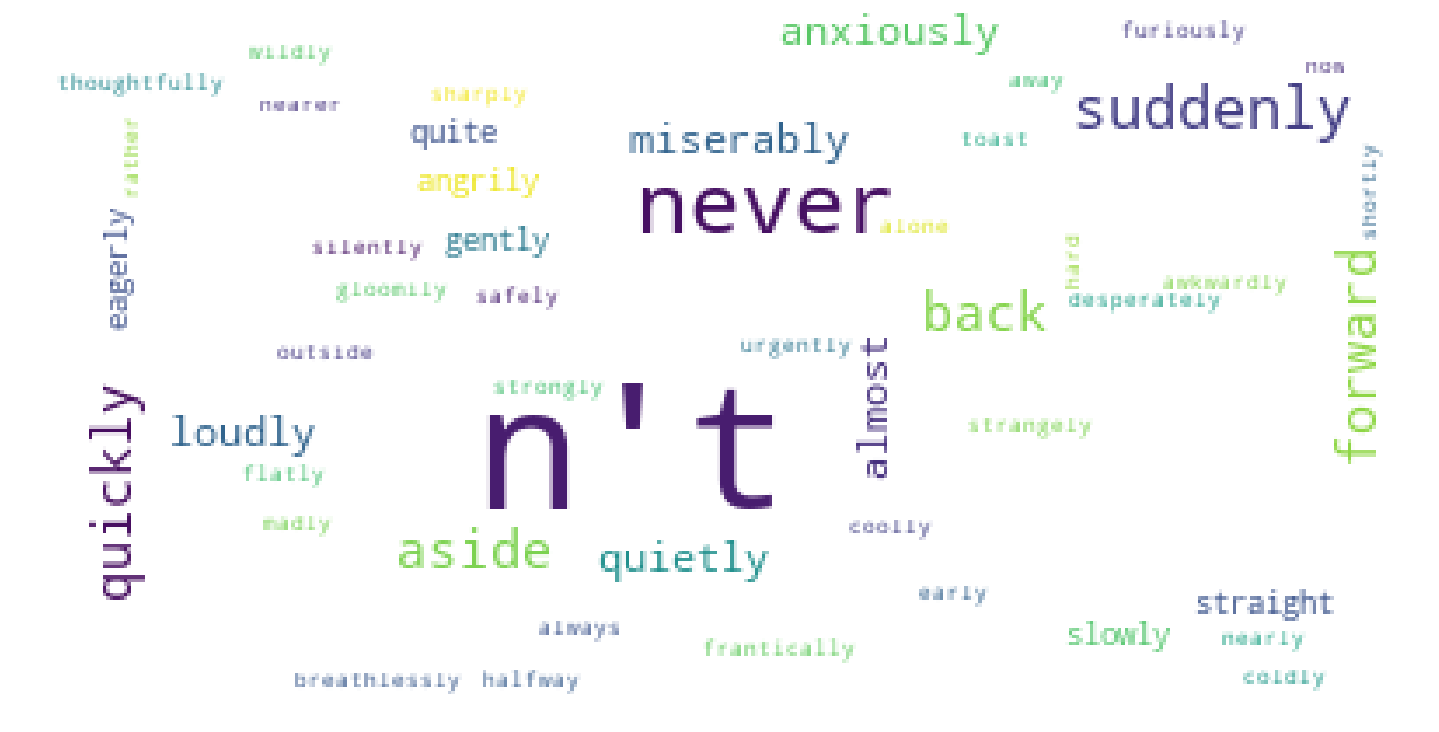

******************** Ron ********************


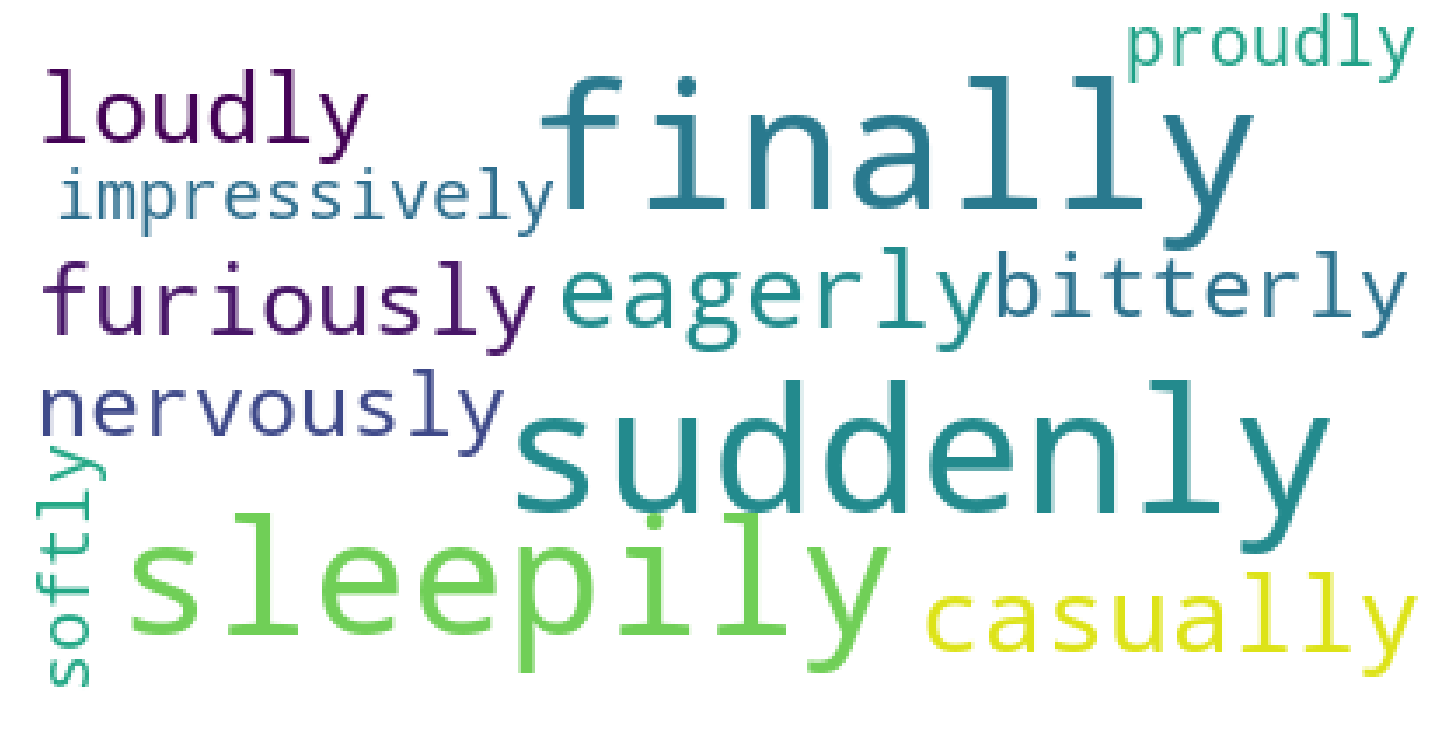

******************** Hermione ********************


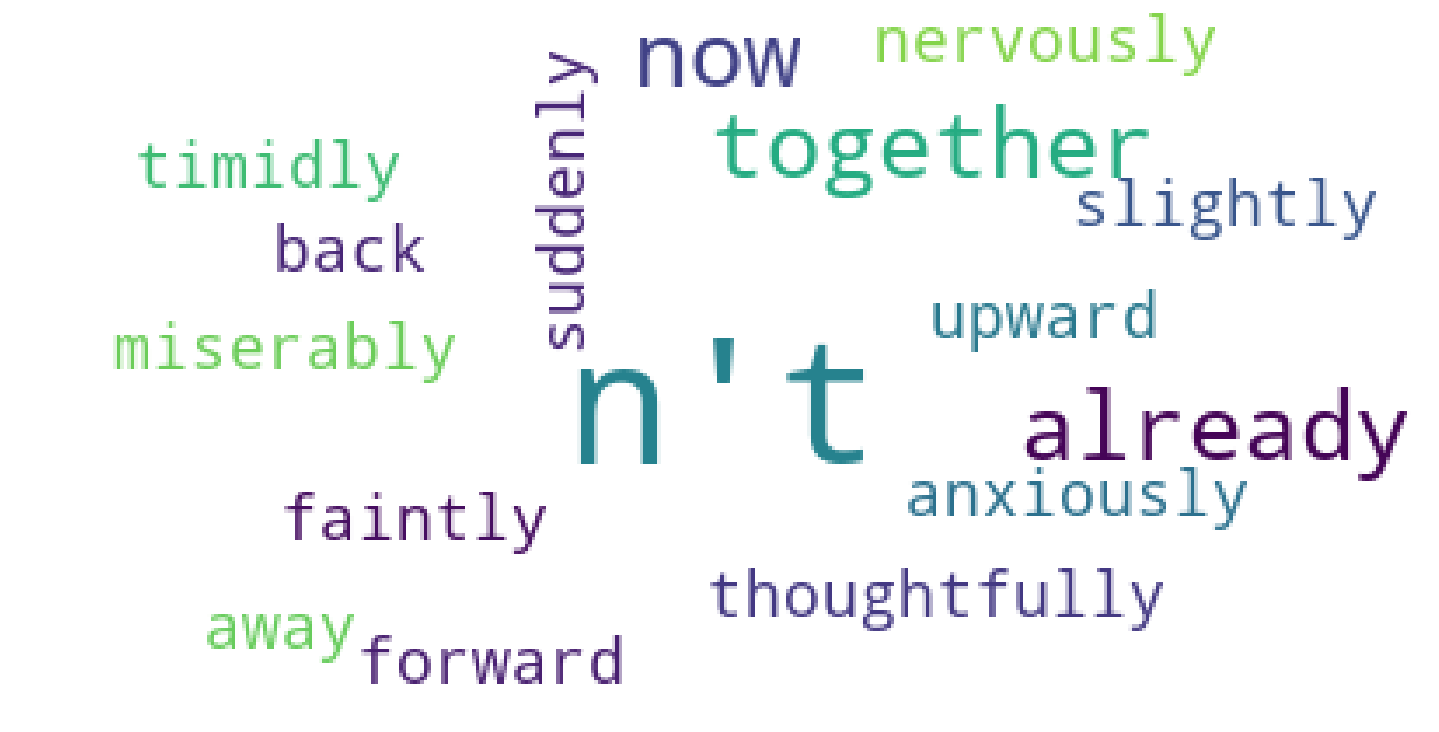

In [19]:
import matplotlib.pyplot as plt
# from PIL import Image
import wordcloud
from wordcloud import WordCloud
#generate the word cloud with parameters
wc = WordCloud(background_color="white", 
               max_words=50, 
               min_font_size =5, 
               max_font_size=50, 
               relative_scaling = 0.7, 
               normalize_plurals= True)



#harry
print ("*" * 20, "Harry", "*" * 20)
wc.generate(' '.join(harry))
plt.figure(figsize=(25,25))
plt.imshow(wc)
plt.axis("off")

plt.show()

#ron
print ("*" * 20, "Ron", "*" * 20)
wc.generate(' '.join(ron))
plt.figure(figsize=(25,25))
plt.imshow(wc)
plt.axis("off")

#Show the wordcloud
plt.show()

#hermione
print ("*" * 20, "Hermione", "*" * 20)
wc.generate(' '.join(hermione))
plt.figure(figsize=(25,25))
plt.imshow(wc)
plt.axis("off")

#Show the wordcloud
plt.show()

#### Step 5: Isolating sexist language
This part is tricky - sexism can be subtle or detectable only with context.  To keep this analysis straightforward, I assembled a list of sexist works to search for in the narrative.

Because the Harry Potter series is written in English by a British writer, I focused on sources from the UK and countries in the Commonwealth.  Using this blog post by a [New Zealand blogger](http://sacraparental.com/2016/05/14/everyday-misogyny-122-subtly-sexist-words-women/) I had a first set of words and some excellent categories to begin with.  I found a number of [other](http://time.com/4268325/history-calling-women-shrill/) excellent articles about sexism in language, which I used to add to the `sexist_words` Python dictionary below, grouping them by type.

In [15]:
sexist_words = { 
    'assertiveness': ['bossy', 'abrasive', 'ball-bust', 'aggressive', 'shrill', 'bolshy', 'intense', 'stroppy', 'mannish', 'strident', 'know-it-all'],
    'behavior' : ['cackle', 'shriek', 'giggl', 'caterwaul', 'yowl', 'screech','gossip', 'dramatic', 'catty', 'bitch', 'nag', 'coldly', 'icy', 'shrew', 'humorless', 'man-hater', 'banshee', 'fishwife', 'lippy', 'ditzy', 'diva', 'prima donna', 'feisty', 'ladylike', 'bubbly', 'vivaious', 'flirt', 'sass', 'chatty', 'demure', 'modest', 'emotional', 'hysterical', 'hormonal', 'menstrual', 'flaky', 'over-sensitive'],
    'sexuality': ['slut', 'trollop', 'frigid', 'tease', 'loose', 'man-eater', 'prude', 'curvy', 'cheap', 'frump', 'mouse', 'clotheshorse', 'hag'],
    'relationship': ['spinster', 'barren', 'housewife', 'houseproud', 'mistress'],
#     'praise': ['care', 'compassion', 'hard-working', 'conscientious', 'dependable', 'diligent', 'dedicated', 'tactful', 'interpersonal', 'warm', 'helpful'],
}

# making this into a list for easier analysis
sexist_words_list = [v[j] for k, v in sexist_words.items() for j in range(len(v))]

Now that we know what words we are looking for, we want to make sure we get all versions of the words; if we only compare them to this list, we'd pick up on `cackle` but not `cackled`.   

To to this, we'll use a stemming algorithm that's part of NLTK.  Let's look at some examples of how this works.  What we want to happen is to have all forms of a word have the same stem.

In [16]:
from nltk.stem.lancaster import LancasterStemmer
st = LancasterStemmer()

# this works really well for some words
print("Bossiness stem:", st.stem('bossiness'))
print("Bossily stem:", st.stem('bossily'))
print("Bossy stem", st.stem('bossy'))

print("Cackled stem:", st.stem('cackled'))
print("Cackling stem:", st.stem('cackling'))
print("Cackle stem:", st.stem('cackle'))

# but not for others
print("Shreiking stem:", st.stem('shrieking'))
print("Shrieked stem:", st.stem('shrieked'))
print("Shriek stem:", st.stem('shriek'))


Bossiness stem: bossy
Bossily stem: bossy
Bossy stem bossy
Cackled stem: cackl
Cackling stem: cackl
Cackle stem: cackl
Shreiking stem: shrieking
Shrieked stem: shrieked
Shriek stem: shriek


As we can see above, this doesn't *always* work, so for extra insurance, we'll have a rule that if the root word is in a word, it counts. 

So, even though the stemmer isn't linking `shrieking` to `shreik`, looking for the letters in `shreik` would.

******************** Sexist words ********************


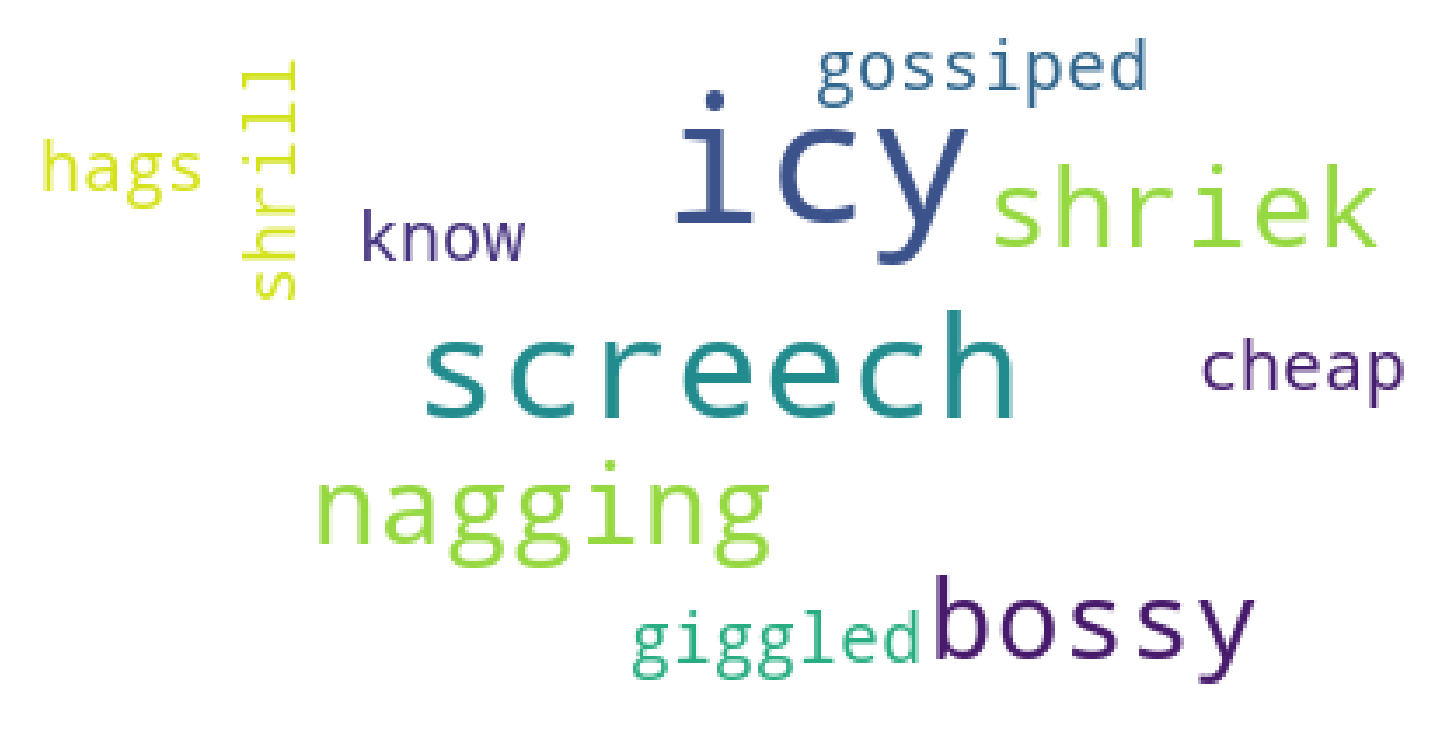

Counter({'icy': 4, 'screech': 3, 'bossy': 2, 'nagging': 2, 'shriek': 2, 'gossiped': 1, 'shrill': 1, 'cheap': 1, 'hags': 1, 'know-it-all': 1, 'giggled': 1})


In [17]:
def sexist_words(t):
    sexist_words_isolated = []
    sexist_words_count = Counter()
    for s in t: # (n, [()])
        sent = pos_tag(s)
        nouns = [j[0] for j in sent if 'NN' in j[1]]
        for word in sent:
            if st.stem(word[0]).lower() in sexist_words_list and word != "Moody":
                sexist_words_isolated.append(word[0].lower())
                sexist_words_count[word[0].lower()] +=1
    return (sexist_words_isolated, sexist_words_count)

p, count = sexist_words(narrative_split_sent)

#sexist words
print ("*" * 20, "Sexist words", "*" * 20)
wc.generate(' '.join(p))
plt.figure(figsize=(25,25))
plt.imshow(wc)
plt.axis("off")

#Show the wordcloud
plt.show()

print(count)

In [18]:
1: 'icy': 4, 'screech': 3, 'bossy': 2, 'nagging': 2, 'shriek': 2, 'gossiped': 1, 'shrill': 1, 'cheap': 1, 'hags': 1, 'know-it-all': 1}
2: Counter({'screech': 3, 'shrill': 3, 'hags': 2, 'icy': 2, 'haggis': 2, 'bossily': 1, 'icily': 1, 'shriek': 1})

SyntaxError: invalid syntax (<ipython-input-18-27b7973163c2>, line 1)